# SIFT - Harris
### SIFT - Harris


maximum_filter:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.maximum_filter.html
gaussian_filter:https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.gaussian_filter.html
sobel:https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html

matplotlib.patches: https://matplotlib.org/api/patches_api.html

np.where: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.where.html
np.argwhere: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argwhere.html

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

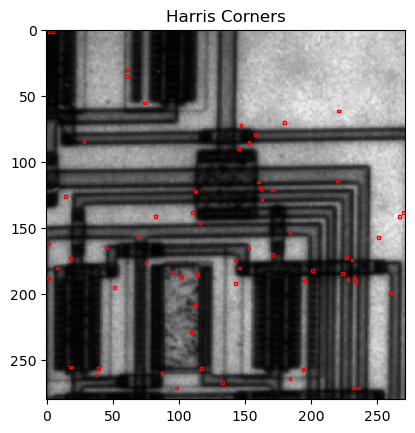

In [3]:
from skimage.filters import gaussian
from scipy.ndimage import maximum_filter,gaussian_filter,sobel
import matplotlib.patches as patches

eps = 1e-6


img = io.imread('circuit.tif')
img_smooth = gaussian_filter(img, sigma=1)


# 3. Sobel derivatives (Ix, Iy)

Ix = sobel(img_smooth, axis=1)   # x-direction
Iy = sobel(img_smooth, axis=0)   # y-direction


# 4. Products of derivatives

Ixx = Ix * Ix
Ixy = Ix * Iy
Iyy = Iy * Iy


# 5. Sum of products using Gaussian window

Sx2 = gaussian_filter(Ixx, sigma=1)
Sxy = gaussian_filter(Ixy, sigma=1)
Sy2 = gaussian_filter(Iyy, sigma=1)


# 6. Harris Response R
# R = (Sx2*Sy2 - Sxy^2) / (Sx2 + Sy2)

R = (Sx2 * Sy2 - Sxy**2) / (Sx2 + Sy2 + eps)


# 7. Threshold

T = 0.01 * np.max(R)
R_thresh = R > T


# 8. Non-max suppression

R_max = (R == maximum_filter(R, size=3))
z = R_thresh & R_max


# 9. Draw rectangles on detected corners

indx = np.argwhere(z == True)

fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')

for ind in indx:
    rect = patches.Rectangle((ind[1], ind[0]), 2, 2,
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.title("Harris Corners")
plt.show()
for ind in indx:
    rect = patches.Rectangle((ind[1],ind[0]),2,2,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

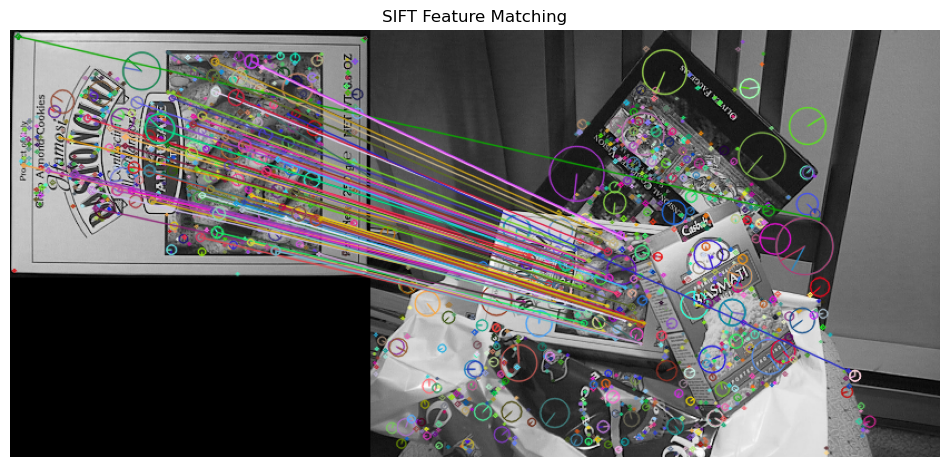

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


sift = cv2.SIFT_create()

## TODO: read image box.png and box_in_scene
img1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

## TODO: find the keypoints and descriptors with SIFT
# Use sift.detectAndCompute
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
#Draw keypoints of img1 using cv2.drawKeypoints
cv2.drawKeypoints(img1, keypoints1, img1)

## TODO: Construct BFMatcher, Hint use cv2.BFMatcher
## Use knnMatch with k = 2 to get the matches between the descriptors 
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

## TODO: Apply ratio test to remove ambigiuous matched (points that has multiple matches)
## Hint: use the distance in match 
## For k=2 knnMatch return the 2 closest matches anyways.
## if the distance between the keypoints and its 2 neighbours is close, then the keypoint is ambigious and 
## you should neglect it
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])
        
img_matches = cv2.drawMatchesKnn(
    img1, keypoints1,
    img2, keypoints2,
    good_matches,
    None,
    flags=4
)

plt.figure(figsize=(12,6))
plt.imshow(img_matches)
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()


## TODO: Draw the matches features use cv2.drawMatchesKnn with flags =4 



# plt.imshow(img3),plt.show()